# Import Real Estate Data

In [2]:
import numpy as np

from utils import import_data, K_fold_split, normal_split, transform_pd, transform_question

datapath = 'datasets/re.csv'

re_data =  import_data(datapath)
print list(re_data)

df = np.array(re_data)

X_data = df[:, :-1]
Y_data = np.reshape(df[:, -1], (X_data.shape[0], 1))

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


# Question - 1

<p float="left" align="center">
  <img src="pic1.JPG" width="400" />
  <img src="pic2.JPG" width="400" />
  <img src="pic3.JPG" width="400" />
</p>

In [3]:
import numpy as np
import torch

def MSE(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return np.sum((Y_predict-Y)**2)/Y.shape[0]

def MSE_torch(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return torch.sum((Y_predict-Y)**2)/Y.shape[0]

def SSE(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return np.sum((Y_predict-Y)**2)

def SSE_torch(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return torch.sum((Y_predict-Y)**2)

# Question -2

In [4]:
from regression import normalEquationRegression, gradientDescentRegression, gradientDescentAutogradRegression, TorchNormalEquationRegression, TorchGradientDescentRegression, TorchGradientDescentAutogradRegression
import numpy as np

X1 = [[1,2], [2,4], [3,6], [4,8]]
Y1 = [[2], [3], [4], [5]]
x = np.array(X1)
y = np.array(Y1)

l = np.ones((4,1))
x = np.append(l, x, axis=1)

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

print reg.coef_, reg.intercept_

[[0.  0.2 0.4]] [1.]


In [6]:
p = np.linalg.inv(x.T.dot(x))
k = p.dot(x.T)
theta = k.dot(y)

print theta

LinAlgError: Singular matrix

# Question - 3

[[-3.59350128e-03  5.07908732e+00 -2.70841959e-01 -4.52079011e-03
   1.12927749e+00  2.24672892e+02 -1.44235635e+01]] [-14038.07978292]
(414, 1)


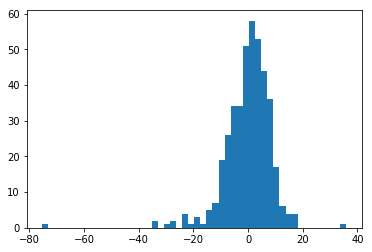

In [8]:
reg = LinearRegression().fit(X_data, Y_data)

print reg.coef_, reg.intercept_

from sklearn.metrics import mean_squared_error
mean_squared_error(X_data.dot(reg.coef_.T)+reg.intercept_, Y_data)


h = X_data.dot(reg.coef_.T)+reg.intercept_-Y_data
print h.shape
x = range(Y_data.shape[0])
import matplotlib.pyplot as plt
plt.hist(h, bins=50)
plt.show()

In [9]:
X_mean = np.sum(X_data, axis=0)
X_data = X_data/X_mean

reg = LinearRegression().fit(X_data, Y_data)

print reg.coef_, reg.intercept_

mean_squared_error(X_data.dot(reg.coef_.T)+reg.intercept_, Y_data)

[[-3.08699728e+02  4.23313319e+06 -1.98608409e+03 -2.02860816e+03
   1.91412534e+03  2.32248378e+06 -7.25718877e+05]] [-14038.07978291]


76.94835499495655

In [10]:
rms = 10000000
index_i = 0
index_j = 0
for i in xrange(X_data.shape[1]):
    for j in xrange(X_data.shape[1]-i):
        s = X_data[:, j:j+i+1]
        reg = LinearRegression().fit(s, Y_data)
        l = mean_squared_error(s.dot(reg.coef_.T)+reg.intercept_, Y_data)
        if l < rms:
            index_i = i
            index_j = j
            rms = l
print index_i, index_j
        

6 0


In [11]:
reg1 = normalEquationRegression(X_data,Y_data)

reg1.train()

array([[-3.47489048e+02],
       [ 3.09059566e+06],
       [-1.99506060e+03],
       [-2.46831150e+03],
       [ 1.90629681e+03],
       [ 2.09951196e+06],
       [-5.17147923e+06]])

# Question - 4

In [39]:
class gradientDescentRegression(object):
    def __init__(self, X, Y, alpha, **kwargs):
        self.X = X #X is a numpy array of nxm 
        self.Y = Y #Y is a numpy array of nx1
        self.samples = X.shape[0]
        self.features = X.shape[1]
        self.theta = None
        self.iterations = None
        self.alpha = alpha #learning rate
        try:
            self.iterations = kwargs['iterations']
        except:
            self.iterations = 100
        self.predictions = None
        
    def training_loss(self, theta):
        return self.MSE(theta)
        

    def initialise_theta(self):
        theta = np.random.rand(self.features, 1)
        self.theta = theta
        return theta
    
    def update_theta(self):
        current_theta = self.theta
        gradients = np.zeros((self.features, 1))
        for i in xrange(self.features):
            if i == 0:
                j = np.sum(self.Y-self.X.dot(current_theta))*(2.0/self.samples)
                gradients[0, 0] = -j
            else:
                j = np.sum((self.Y-self.X.dot(current_theta))*np.reshape(self.X[:, i], (self.samples,1)))*(2.0/self.samples)
                gradients[i, 0] = -j
        current_theta -= gradients*self.alpha
        self.theta = current_theta
        return current_theta

    def train(self):
        theta = None
        self.initialise_theta()
        error = 0.00001
        for i in xrange(self.iterations):
            print ''
            theta = self.update_theta()
            print 'Iteration -  '+ str(i+1)
            print ''
            if self.MSE(theta) <= error:
                break
        print '### Training complete'
        

    def predict(self, X_test):
        '''
        Assumes thats X_test has the bias festure added to it, however an assert is done
        '''
        assert(X_test.shape[1] == self.theta.shape[0])
        predictions = X_test.dot(self.theta)
        self.predictions = predictions
        return predictions

    def accuracy(self, Y_test, metric):
        if metric == 'MSE':
            return MSE(self. predictions, Y_test)
        elif metric == 'SSE':
            return SSE(self. predictions, Y_test)

    
    def MSE(self, theta):
        Yy = self.X.dot(theta)
        assert(self.Y.shape[0] == Yy.shape[0])
        return np.sum((self.Y-Yy)**2)/self.samples


def MSE(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return np.sum((Y_predict-Y)**2)/Y.shape[0]

def MSE_torch(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return torch.sum((Y_predict-Y)**2)/Y.shape[0]

def SSE(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return np.sum((Y_predict-Y)**2)

def SSE_torch(Y_predict, Y):
    assert(Y_predict.shape[0] == Y.shape[0])
    return torch.sum((Y_predict-Y)**2)


### Numpy-Gradient Descent

In [13]:
reg2 = gradientDescentRegression(X_data,Y_data, 0.0000001)
reg2.train()


Iteration -  1


Iteration -  2


Iteration -  3


Iteration -  4


Iteration -  5


Iteration -  6


Iteration -  7


Iteration -  8


Iteration -  9


Iteration -  10


Iteration -  11


Iteration -  12


Iteration -  13


Iteration -  14


Iteration -  15


Iteration -  16


Iteration -  17


Iteration -  18


Iteration -  19


Iteration -  20


Iteration -  21


Iteration -  22


Iteration -  23


Iteration -  24


Iteration -  25


Iteration -  26


Iteration -  27


Iteration -  28


Iteration -  29


Iteration -  30


Iteration -  31


Iteration -  32


Iteration -  33


Iteration -  34


Iteration -  35


Iteration -  36


Iteration -  37


Iteration -  38


Iteration -  39


Iteration -  40


Iteration -  41


Iteration -  42


Iteration -  43


Iteration -  44


Iteration -  45


Iteration -  46


Iteration -  47


Iteration -  48


Iteration -  49


Iteration -  50


Iteration -  51


Iteration -  52


Iteration -  53


Iteration -  54


Iteration -  55


Iteration -  56




In [14]:
print reg2.theta

[[0.44530336]
 [0.41664577]
 [0.25013058]
 [0.76381739]
 [0.74025884]
 [0.84706616]
 [0.95079857]]


In [27]:
from autograd import grad

### Numpy Gradient Descent Using Autograd

In [38]:
class gradientDescentAutogradRegression(gradientDescentRegression):
    def __init__(self,  X, Y, alpha, **kwargs):
        super(gradientDescentAutogradRegression, self).__init__(X, Y, alpha, **kwargs)
        self.gradient_func = grad(self.training_loss)

    def update_theta(self):
        current_theta = self.theta
        current_theta -= self.gradient_func(current_theta)*self.alpha
        self.theta = current_theta
        return current_theta
    
    
    
reg3 = gradientDescentAutogradRegression(X_data,Y_data,0.0000001)
reg3.train()


Iteration -  1


Iteration -  2


Iteration -  3


Iteration -  4


Iteration -  5


Iteration -  6


Iteration -  7


Iteration -  8


Iteration -  9


Iteration -  10


Iteration -  11


Iteration -  12


Iteration -  13


Iteration -  14


Iteration -  15


Iteration -  16


Iteration -  17


Iteration -  18


Iteration -  19


Iteration -  20


Iteration -  21


Iteration -  22


Iteration -  23


Iteration -  24


Iteration -  25


Iteration -  26


Iteration -  27


Iteration -  28


Iteration -  29


Iteration -  30


Iteration -  31


Iteration -  32


Iteration -  33


Iteration -  34


Iteration -  35


Iteration -  36


Iteration -  37


Iteration -  38


Iteration -  39


Iteration -  40


Iteration -  41


Iteration -  42


Iteration -  43


Iteration -  44


Iteration -  45


Iteration -  46


Iteration -  47


Iteration -  48


Iteration -  49


Iteration -  50


Iteration -  51


Iteration -  52


Iteration -  53


Iteration -  54


Iteration -  55


Iteration -  56




In [29]:
print reg3.theta

[[0.73579924]
 [0.45077633]
 [0.65319628]
 [0.58046875]
 [0.88518452]
 [0.13779808]
 [0.44304855]]


In [25]:
import torch

### Pytorch Matrix

In [ ]:
class NotTrained(Exception):
    def __init__(self):
        self.message = "Theta has not been trained yet to predict"
    def __str__(self):
        return self.message


class TorchNormalEquationRegression(object):
    '''
    The following assumes that a bias column has been added to X (1st column), before sending it into the regressor.

    The following convention is following : rows -> samples ; columns -> features
    '''
    def __init__(self, X, Y):
        self.X = X #X is a numpy array of nxm 
        self.Y = Y #Y is a numpy array of nx1
        self.samples = X.shape[0]
        self.features = X.shape[1]
        self.theta = None

    def train(self):
        p = torch.inverse(self.X.t().mm(self.X))
        k = p.mm(self.X.t())
        theta = k.mm(self.Y)
        assert(theta.shape[0] == self.features)
        assert(theta.shape[1] == 1)
        self.theta = theta
        return theta

    def predict(self, X_test):
        if self.theta == None:
            raise NotTrained()
        else:
            return X_test.mm(self.theta) #return nx1 matrix of predicted values

In [ ]:
x_t = torch.from_numpy(X_data).double()
y_t = torch.from_numpy(Y_data).double()

In [ ]:
reg4 = TorchNormalEquationRegression(x_t,y_t)
reg4.train()
print reg4.theta

### Pytorch Normal Gradient Descent

In [ ]:
class TorchGradientDescentRegression(object):
    def __init__(self, X, Y, alpha, **kwargs):
        self.X = X #X is a numpy array of nxm 
        self.Y = Y #Y is a numpy array of nx1
        self.samples = X.shape[0]
        self.features = X.shape[1]
        self.theta = None
        self.iterations = None
        self.alpha = alpha #learning rate
        self.gradient_func = grad(self.training_loss)
        try:
            self.iterations = kwargs['iterations']
        except:
            self.iterations = 1000
        self.predictions = None

    def training_loss(self, theta):
        return self.MSE(theta)

    def initialise_theta(self):
        theta = torch.rand(self.features, 1).double()
        self.theta = theta
        return theta
    
    def update_theta(self):
        current_theta = self.theta
        gradients = torch.zeros((self.features, 1))
        for i in xrange(self.features):
            if i == 0:
                j = torch.sum(self.Y-self.X.mm(current_theta))*(2.0/self.samples)
                gradients[0, 0] = -j
            else:
                j = torch.sum((self.Y-self.X.mm(current_theta))*torch.reshape(self.X[:, i], (self.samples,1)))*(2.0/self.samples)
                gradients[i, 0] = -j
        current_theta -= (gradients*self.alpha).double()
        print gradients
        print ''
        self.theta = current_theta
        return current_theta

    def train(self):
        self.initialise_theta()
        error = 10
        for i in xrange(self.iterations):
            print ''
            theta = self.update_theta()
            print 'Iteration -  '+ str(i+1)
            print ''
            if self.MSE(theta) <= error:
                break
        print '### Training complete'
        

    def predict(self, X_test):
        '''
        Assumes thats X_test has the bias festure added to it, however an assert is done
        '''
        assert(X_test.shape[1] == self.theta.shape[0])
        predictions = X_test.mm(self.theta)
        self.predictions = predictions
        return predictions

    def accuracy(self, Y_test, metric):
        if metric == 'MSE':
            return MSE_torch(self. predictions, Y_test)
        elif metric == 'SSE':
            return SSE_torch(self. predictions, Y_test)

    def MSE(self, theta):
        Yy = self.X.mm(theta.double())
        assert(self.Y.shape[0] == Yy.shape[0])
        return torch.sum((self.Y-Yy)**2)/self.samples

In [ ]:
x_t = torch.from_numpy(X_data).double()
y_t = torch.from_numpy(Y_data).double()

reg5 = TorchGradientDescentRegression(x_t, y_t, 0.0000001)
reg5.train()

In [ ]:
print reg5.theta

### PyTorch using Autograd

In [ ]:
class TorchGradientDescentAutogradRegression(TorchGradientDescentRegression):
    def __init__(self,  X, Y, alpha, **kwargs):
        super(TorchGradientDescentAutogradRegression, self).__init__(X, Y, alpha, **kwargs)
        self.objective = None
        self.gradients = None

    def initialise_theta(self):
        try:
            j = self.theta[0, 0]
            theta = torch.tensor(self.theta, requires_grad=True)
        except:
            theta = torch.rand(self.features, 1, requires_grad=True)
        self.theta = theta
        return theta    

    def ForwardFunction(self):
        p = torch.mean((self.Y-self.X.mm(self.theta.double()))**2)
        self.objective = p
        return p
    
    def get_grads(self):
        self.initialise_theta()
        k = self.ForwardFunction()
        self.objective.backward()
        self.gradients = self.theta.grad
#         self.theta = self.theta.clone()
        return self.gradients

    def update_theta(self):
        h = self.get_grads()
        current_theta = self.theta.clone()
        current_theta -= self.gradients*self.alpha
        self.theta = current_theta
        return current_theta

    def train(self):
        self.initialise_theta()
        error = 0.0001
        for i in xrange(self.iterations):
            print ''
            theta = self.update_theta()
            print 'Iteration -  '+ str(i+1)
            print ''
            print self.MSE(theta)
            if self.MSE(theta) <= error:
                break
        print '### Training complete'
    
    

In [ ]:
reg6 = TorchGradientDescentAutogradRegression(x_t, y_t, 0.00000015)
# theta = reg6.initialise_theta()
# gh = reg6.ForwardFunction()
# print reg6.get_grads()
reg6.train()

In [ ]:
print reg6.theta

# Question - 5

In [ ]:
import numpy as np
xx = np.arange(0, 20.1, 0.1)
np.random.seed(0)
yy = 1*xx**5 + 3*xx**4 - 100*xx**3 + 8*xx**2 -300*xx - 1e5 + np.random.randn(len(xx))*1e5

print xx.shape, yy.shape

In [ ]:
XX = np.array(xx)
XX = np.reshape(XX, (XX.shape[0], 1))
XT = np.append(np.ones((XX.shape[0], 1)), XX, axis=1) #, XX**2, XX**3, XX**4, XX**5,
XT = np.append(XT, XX**2, axis=1)
XT = np.append(XT, XX**3, axis=1)
XT = np.append(XT, XX**4, axis=1)
XT = np.append(XT, XX**5, axis=1)
YY = np.array(yy)
YT = np.reshape(YY, (YY.shape[0], 1))

### For Polynomial of Degree - 5

In [ ]:
reg2 = gradientDescentRegression(XT,YT, 0.000000000001, iterations=10000)
reg2.train()

In [ ]:
print reg2.theta
print MSE(XT.dot(reg2.theta), YT)

### For Polynomial of Degree - 4

In [ ]:
XT = XT[:, :-1]
reg2 = gradientDescentRegression(XT,YT, 0.000000000001, iterations=10000)
reg2.train()

In [ ]:
print reg2.theta
print MSE(XT.dot(reg2.theta), YT)

# Question - 6

(200, 200) (200, 200)


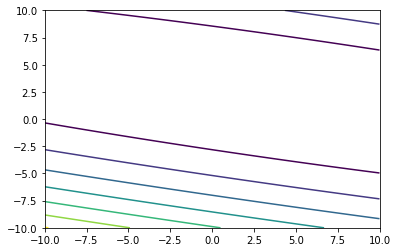

In [55]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

xx = [[1], [3], [6]]
yy = [[6], [10], [16]]
xx = np.array(xx)
yy = np.array(yy)
yy = np.reshape(yy, (3,1))
xx = np.append(np.ones((3,1)), np.reshape(xx, (3,1)), axis=1)

X,Y = np.meshgrid(x, y)
print X.shape, Y.shape

Z = np.zeros((X.shape[0], X.shape[0]))
theta = np.zeros((2,1))
for i in xrange(X.shape[0]):
    for j in xrange(Y.shape[0]):
        theta[0, 0] = X[i, j]
        theta[1, 0] = Y[i, j]
        l = np.sum((xx.dot(theta)-yy)**2)
        Z[i, j] = l

function = X**2 + Y**2
f  = lambda X, Y: X**2 + Y**2
plt.contour(X, Y, Z)
plt.show()

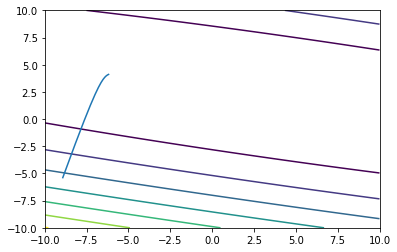

In [67]:
reg3 = gradientDescentAutogradRegression(xx,yy,0.01)
reg3.theta = np.ones((2,1))*-10
x_list = list()
y_list = list()
for i in xrange(12):
    l = reg3.update_theta()
    x_list.append(l[0, 0])
    y_list.append(l[1, 0])
    
plt.contour(X, Y, Z)
plt.plot(x_list, y_list)
plt.show()